In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `c:\Users\fefif\Desktop\PhD\Progetti\MatrixProductBP.jl`


In [2]:
using Revise
using TensorTrains, MatrixProductBP, Plots, Tullio, JLD2
includet("bp_fourier.jl")

In [3]:
K = 100
d = 3
P = 2.0
σ = 1/50
T = 4
q = (2,)
;

In [4]:
D = load("messages.jld2")
A = D["msg"][5]

F = FourierTensorTrain_spin(A,K,d,P,σ)

FourierTensorTrain{Float64, 4}(OffsetArray{ComplexF64, 4, Array{ComplexF64, 4}}[[3.578582917592971e-18 + 6.198287432369171e-18im 2.725427836641937e-18 + 4.7205794854264235e-18im;;; 1.5701159762706898e-17 - 7.671912590789896e-33im 1.1957911517005377e-17 - 5.8428837941490364e-33im;;; 1.70869023590414e-17 - 2.959538302982865e-17im 1.3013284980032702e-17 - 2.2539670758789915e-17im;;; … ;;; 1.70869023590414e-17 + 2.959538302982865e-17im 1.3013284980032702e-17 + 2.2539670758789915e-17im;;; 1.5701159762706898e-17 + 7.671912590789896e-33im 1.1957911517005377e-17 + 5.8428837941490364e-33im;;; 3.578582917592971e-18 - 6.198287432369171e-18im 2.725427836641937e-18 - 4.7205794854264235e-18im;;;; 3.578582917592971e-18 + 6.198287432369171e-18im -2.725427836641937e-18 - 4.7205794854264235e-18im;;; 1.5701159762706898e-17 - 7.671912590789896e-33im -1.1957911517005377e-17 + 5.8428837941490364e-33im;;; 1.70869023590414e-17 - 2.959538302982865e-17im -1.3013284980032702e-17 + 2.2539670758789915e-17im;;; … ;

In [5]:
Px = marginals(A)

5-element Vector{Matrix{Float64}}:
 [1.1891229846364983e-17 0.0; 0.5 0.5]
 [0.2500000000000001 0.25; 0.25 0.24999999999999992]
 [0.25 0.25000000000000006; 0.25 0.25000000000000006]
 [0.25 0.25; 0.24999999999999997 0.24999999999999997]
 [0.25 0.25; 0.24999999999999994 0.24999999999999994]

In [6]:
import MatrixProductBP: marginalize
function marginalize(A::FourierTensorTrain{F,4}, var) where F
    if var==1
        return FourierTensorTrain{F,3}([@tullio b[m, n, xi] := a[m, n, xi, xj] for a in A] ; z = A.z)
    elseif var==2
        return FourierTensorTrain{F,3}([@tullio b[m, n, xj] := a[m, n, xi, xj] for a in A]; z = A.z)
    end
end;

PxF = marginals(marginalize(F,1),2.0)

5-element Vector{TensorTrains.var"#249#252"{OffsetVector{ComplexF64, Vector{ComplexF64}}, Float64, Int64}}:
 #249 (generic function with 1 method)
 #249 (generic function with 1 method)
 #249 (generic function with 1 method)
 #249 (generic function with 1 method)
 #249 (generic function with 1 method)

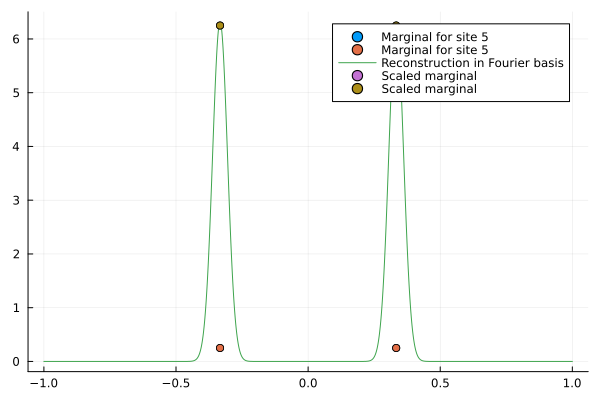

In [7]:
t = 5

Pxt = Px[t]
PxFt = PxF[t]
xplot = collect(-1:0.001:1)
yplot = PxFt.(xplot)
scatter([-1/d,1/d], Pxt, label="Marginal for site $t")
plot!(xplot, yplot, label="Reconstruction in Fourier basis")

scale = 25
scatter!([-1/d,1/d], Pxt.*scale, label="Scaled marginal")